In [8]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
# use pacbio conda environment
import ast

In [9]:
#set matplotlib rc parameters
def set_rc_params():
    #set matplotlib default parameters
    rcParams['xtick.major.width'] = 2
    rcParams['ytick.major.width'] = 2
    rcParams['axes.linewidth'] = 2
    #rcParams['lines.linewidth'] = 2
    #remove top and right lines
    rcParams['axes.spines.top'] = False
    rcParams['axes.spines.right'] = False
    #font size
    fontsize = 14
    rcParams['font.size'] = fontsize
    #for getting the microsoft font Arial working, please follow this guide: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['Arial']
    #allow font to be edited later in pdf editor
    #make svg text editable
    rcParams['svg.fonttype'] = 'none'
    rcParams ['pdf.fonttype'] = 42 
    #align y-axis top most tick with end of axis
    rcParams['axes.autolimit_mode'] = 'round_numbers'
    #set margins to ensure any error bars fit
    rcParams['axes.xmargin'] = 0.2
    rcParams['axes.ymargin'] = 0.2
    #define bar width
    #bar_width = 0.65
    return fontsize
    

In [10]:
# process data function
def process_data(file):
    df = pd.read_csv(file, header=0, sep='\t')
    # remove chimeric genotype
    df = df[df['genotype'] != 'chimeric']

    return df



In [11]:
# function to make plots showing location of each mutation relative to the TSS
# show type of mutation (insertion, deletion, substitution)
# use insertion_positions_relative_to_TSS_combined, deletion_positions_relative_to_TSS_combined and substitution_positions_relative_to_TSS_combined columns
# plot each mutation type in a different colour
def plot_mutations(df, ax, title):
    # remove non-chimeric genotypes
    df = df[df['genotype'] != 'chimeric']
   
    #create list of dictionaries of each row in df
    insertions = df['insertion_positions_relative_to_TSS_combined'].explode().to_list()
    # remove nan
    insertions = [x for x in insertions if str(x) != 'nan']
    # convert string form of list into list
    insertions = [ast.literal_eval(x) for x in insertions]
    #print(insertions)
    #remove every other element in each list in the list
    insertions = [x[::2] for x in insertions]
    #print(insertions)
    # flatten the list
    insertions = [item for sublist in insertions for item in sublist]
    #print(insertions)
    # remove every other item in list
    #take the mean of every 2 numbers in the list
    #insertions = [sum(insertions[i:i+2])/2 for i in range(0, len(insertions), 2)]
    #print(insertions)
    #insertions = insertions[::2]

    deletions = df['deletion_positions_relative_to_TSS_combined'].explode().to_list()
    # remove nan
    deletions = [x for x in deletions if str(x) != 'nan']
    # convert string form of list into list
    deletions = [ast.literal_eval(x) for x in deletions]
    # flatten the list
    deletions = [item for sublist in deletions for item in sublist]

    substitutions = df['substitution_positions_relative_to_TSS_combined'].explode().to_list()
    # remove nan
    substitutions = [x for x in substitutions if str(x) != 'nan']
    # convert string form of list into list
    substitutions = [ast.literal_eval(x) for x in substitutions]
    # flatten the list
    substitutions = [item for sublist in substitutions for item in sublist]

    # get counts of each insertion position
    insertion_counts = {}
    for i in insertions:
        if i in insertion_counts:
            insertion_counts[i] += 1
        else:
            insertion_counts[i] = 1

    # get counts of each deletion position
    deletion_counts = {}
    for i in deletions:
        if i in deletion_counts:
            deletion_counts[i] += 1
        else:
            deletion_counts[i] = 1
    
    # get counts of each substitution position
    substitution_counts = {}
    for i in substitutions:
        if i in substitution_counts:
            substitution_counts[i] += 1
        else:
            substitution_counts[i] = 1




    # plot the mutation positions on x axis, counts on y axis seaborn scatterplot

    
    #set up three colours suitable for colorblindness
    colours = ['#1f77b4', '#ff7f0e', '#2ca02c']
    #labels = ['Insertions', 'Deletions', 'Substitutions']
    #make scatter plot with different symbol and colour for each mutation type
    size = 100
    sns.scatterplot(x=insertion_counts.keys(),y=insertion_counts.values(), marker='+',s=size, color=colours[0], label='Insertions', ax=ax)
    sns.scatterplot(x=deletion_counts.keys(),y=deletion_counts.values(), marker='_',s=size, color=colours[1], label='Deletions', ax=ax)
    sns.scatterplot(x=substitution_counts.keys(),y=substitution_counts.values(), marker='*',s=size, color=colours[2], label='Substitutions', ax=ax)

    # label axes
    ax.set_xlabel('Position relative to TSS')
    ax.set_ylabel('Mutation count')
    ax.xaxis.set_tick_params(which='both', labelbottom=True)

    # remove legend border
    ax.legend(frameon=False)

    # put legend outside of plot 
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    #add title
    ax.set_title(title)
    # set x and y axes to start at 0
    # ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)
    

    
    


    
    # remove plot
    #plt.clf()



    


In [12]:
def deletion_size_plot(df,ax,title):
    """Function to make plot showing distribution of deletion sizes for a specific gene"""
    # make plot showing distribution of deletion sizes - use deletion_sizes column
    # remove non-chimeric deletions
    df = df[df['genotype'] != 'chimeric']

    # use seaborn histplot
    # make new column with deletion sizes as integers
    deletion_sizes = df['deletion_sizes'].explode().to_list()
    # remove nan
    deletion_sizes = [x for x in deletion_sizes if str(x) != 'nan']
    # convert string form of list into list
    deletion_sizes = [ast.literal_eval(x) for x in deletion_sizes]
    # flatten the list
    deletion_sizes = [item for sublist in deletion_sizes for item in sublist]

    # get counts of each deletion size
    deletion_counts = {}
    for i in deletion_sizes:
        if i in deletion_counts:
            deletion_counts[i] += 1
        else:
            deletion_counts[i] = 1
    #print(deletion_counts)
    #make new dict with deletion size and count columns
    deletion_dict = {'deletion_size': list(deletion_counts.keys()), 'counts': list(deletion_counts.values())}

    # # make a df with the deletion sizes and counts
    # deletion_df = pd.DataFrame.from_dict(deletion_dict)
    # #make all columns numeric
    # deletion_df = deletion_df.apply(pd.to_numeric)
    # #print(deletion_df)
    # sns.scatterplot(deletion_df,x='deletion_size',y='counts', ax=ax, color='black',alpha=0.03)
    sns.scatterplot(x=deletion_counts.keys(),y=deletion_counts.values(), ax=ax, color='black', alpha=0.4)
    # label axes
    ax.set_xlabel('Deletion size')
    ax.set_ylabel('Count')
    # set x and y axes to start at 0
    ax.set_xlim(0)
    ax.set_ylim(0)
    # add title
    ax.set_title(title)

In [13]:
#main function
def main():
    # file locations
    arf9 = '../../data/CRISPR_library/pacbio/demultiplexed/Data_Package_Batch_04_04_2022/Sam_Witham_EI_SW_ENQ-5142_A_01_Additional_Barcode_Analysis/Variant_call/ARF9/ARF9_TFBSoverlapping_genotyped_only_mutated_flattened.tsv'
    arf18 = '../../data/CRISPR_library/pacbio/demultiplexed/Data_Package_Batch_04_04_2022/Sam_Witham_EI_SW_ENQ-5142_A_01_Additional_Barcode_Analysis/Variant_call/ARF18_filtered/ARF18_TFBSoverlapping_genotyped_only_mutated_flattened.tsv'
    nlp7 = '../../data/CRISPR_library/pacbio/demultiplexed/Data_Package_Batch_04_04_2022/Sam_Witham_EI_SW_ENQ-5142_A_01_Additional_Barcode_Analysis/Variant_call/NLP7/NLP7_TFBSoverlapping_genotyped_only_mutated_flattened.tsv'
    dreb26 = '../../data/CRISPR_library/pacbio/demultiplexed/Data_Package_Batch_04_04_2022/Sam_Witham_EI_SW_ENQ-5142_A_01_Additional_Barcode_Analysis/Variant_call/DREB26/DREB26_TFBSoverlapping_genotyped_only_mutated_flattened.tsv'

    output_location = '../../data/CRISPR_library'
    # read in and process data 
    arf9_df = process_data(arf9)
    arf18_df = process_data(arf18)
    nlp7_df = process_data(nlp7)
    dreb26_df = process_data(dreb26)
    

    # set matplotlib rc parameters
    fontsize = set_rc_params()

    #make new folder
    dirName = f'{output_location}/sequencing_plots'
    try:
        # Create target Directory
        os.mkdir(dirName)
        print("Directory " , dirName ,  " created") 
    except FileExistsError:
        print("Directory " , dirName , " already exists")
    # plot data
    # mutations
    ##set up figure
   # fig, axes = plt.subplot(figsize=(10, 8))
    #make 4 subplots
    fig, axes = plt.subplots(4, 1, figsize=(9, 10), sharex=True,)
    
    #flatten axis array
    axes = axes.flatten()
    
    
    plot_mutations(arf9_df, axes[0], 'ARF9')
    plot_mutations(arf18_df, axes[1], 'ARF18')
    plot_mutations(dreb26_df, axes[2], 'DREB26')
    plot_mutations(nlp7_df, axes[3],'NLP7')
    # # turn off legend for first column of plots
    # axes[0].legend().set_visible(False)
    # axes[2].legend().set_visible(False)
    # prevent overlap of title and x axis label
    fig.tight_layout()
    # save figure bbox tight as svg and pdf using fstring
    plt.savefig(f'{dirName}/mutation_plot.svg', bbox_inches='tight')
    plt.savefig(f'{dirName}/mutation_plot.pdf', bbox_inches='tight')
    # remove plots
    plt.clf()

    #make four more subplots
    fig2, axes2 = plt.subplots(2, 2, figsize=(10, 8), sharex=False)
    #flatten axis array
    axes2 = axes2.flatten()
    # make deletion size plots
    deletion_size_plot(arf9_df, axes2[0], 'ARF9')
    deletion_size_plot(arf18_df, axes2[1], 'ARF18')
    deletion_size_plot(dreb26_df, axes2[2], 'DREB26')
    deletion_size_plot(nlp7_df, axes2[3], 'NLP7')
 

    #save figure 2
    fig2.tight_layout()
    
    plt.savefig(f'{dirName}/deletion_size_plot.svg', bbox_inches='tight')
    plt.savefig(f'{dirName}/deletion_size_plot.pdf', bbox_inches='tight')



    

    #print(arf9_df)





Directory  ../../data/CRISPR_library/sequencing_plots  already exists


<Figure size 648x720 with 0 Axes>

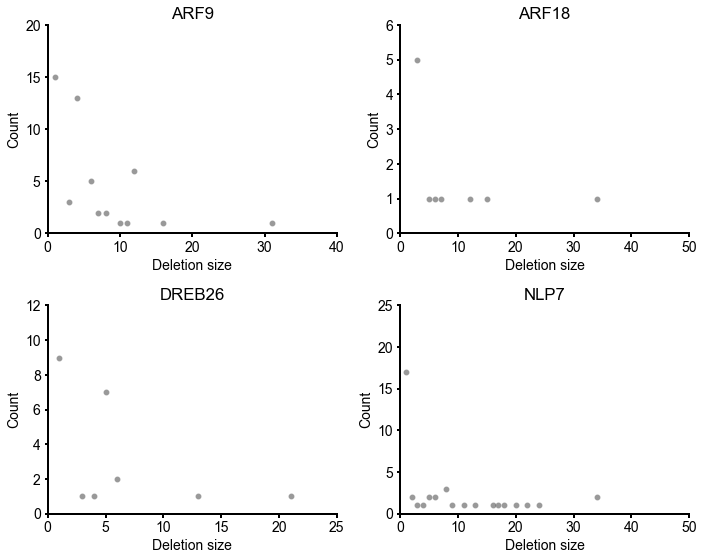

In [14]:
#run main
if __name__ == '__main__':
    main()